In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [ ]:
lena_gray = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)

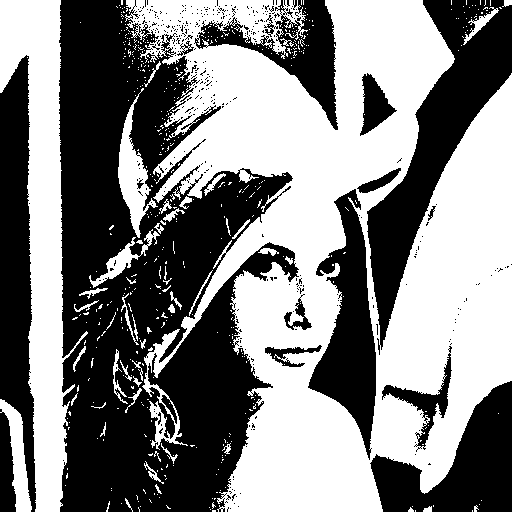

In [ ]:
binarize_lena = lena_gray//128*255
cv2_imshow(binarize_lena)

In [ ]:
octogonal_kernel = np.array([[0,1,1,1,0],
                             [1,1,1,1,1],
                             [1,1,1,1,1],
                             [1,1,1,1,1],
                             [0,1,1,1,0]])
pattern_sum = np.sum(octogonal_kernel)

In [ ]:
def Convolu(img, pattern):
  n,m = pattern.shape
  padding_img = np.zeros((img.shape[0]+n-1,img.shape[1]+m-1))
  n_size = (n-1)//2
  m_size = (m-1)//2
  padding_img[n_size:-n_size,m_size:-m_size]=img
  padding_img_to1 = padding_img//255
  convolu_img_to1 = np.zeros(img.shape)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      convolu_img_to1[i,j] = np.sum(padding_img_to1[i:i+n,j:j+m]*pattern)
  return convolu_img_to1

In [ ]:
def Dilation(convolu_img):
  return (convolu_img>0.5)*255

def Erosion(convolu_img):
  return (convolu_img>pattern_sum-0.5)*255

In [ ]:
convolu_binarize_lena = Convolu(binarize_lena, octogonal_kernel)

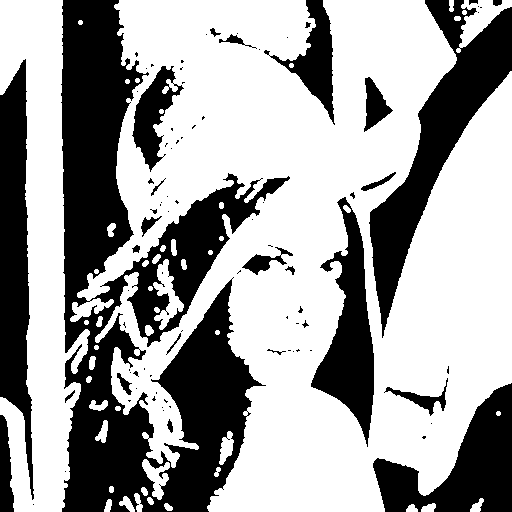

In [ ]:
Dilation_binarize_lena = Dilation(convolu_binarize_lena)
cv2_imshow(Dilation_binarize_lena)

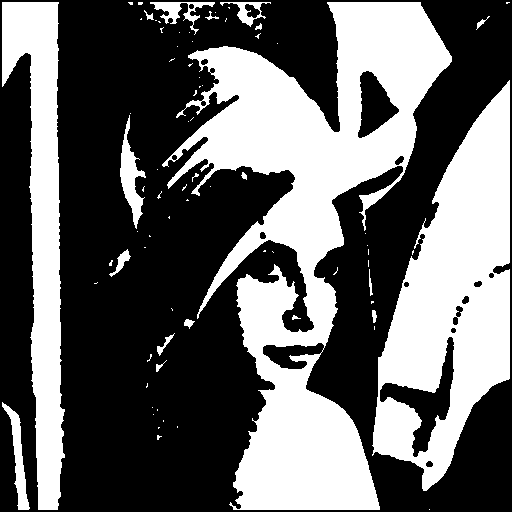

In [ ]:
Erosion_binarize_lena = Erosion(convolu_binarize_lena)
cv2_imshow(Erosion_binarize_lena)

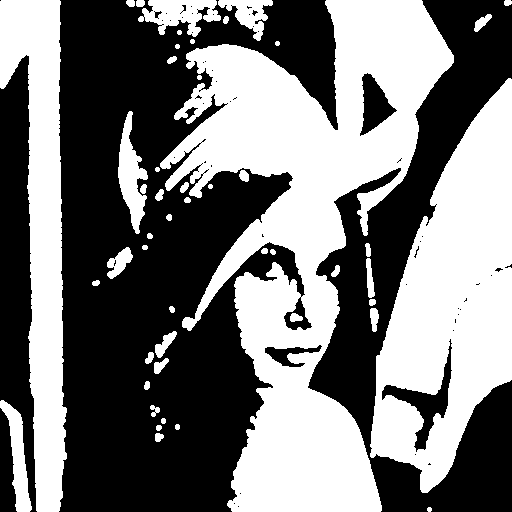

In [ ]:
convolu_Erosion_binarize_lena = Convolu(Erosion_binarize_lena, octogonal_kernel)
Opening_binarize_lena = Dilation(convolu_Erosion_binarize_lena)
cv2_imshow(Opening_binarize_lena)

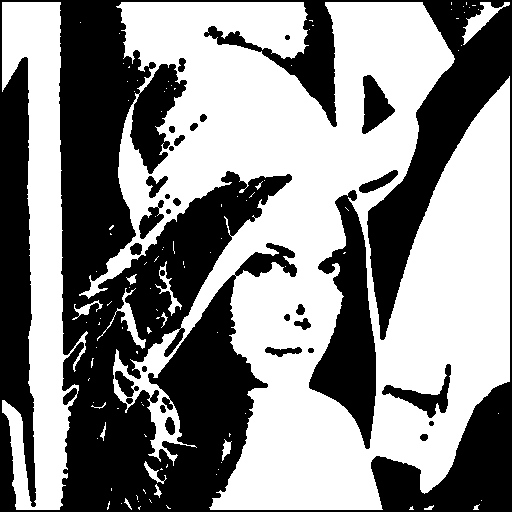

In [ ]:
convolu_Dilation_binarize_lena = Convolu(Dilation_binarize_lena, octogonal_kernel)
Closing_binarize_lena = Erosion(convolu_Dilation_binarize_lena)
cv2_imshow(Closing_binarize_lena)

In [ ]:
J = np.array([[0,0,0],[1,1,0],[0,1,0]])
K = np.array([[0,1,1],[0,0,1],[0,0,0]])

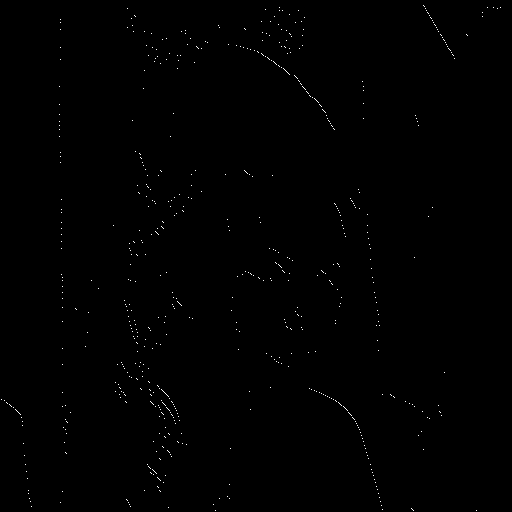

In [ ]:
Jconvolu_binarize_lena = Convolu(binarize_lena, J)
pattern_sum = np.sum(J)
JErosion = Erosion(Jconvolu_binarize_lena)
Kconvolu_binarize_lena = Convolu(255-binarize_lena, K)
pattern_sum = np.sum(K)
KErosion = Erosion(Kconvolu_binarize_lena)
HitandMiss_binarize_lena = ((JErosion > 128)&(KErosion > 128))*255
cv2_imshow(HitandMiss_binarize_lena)

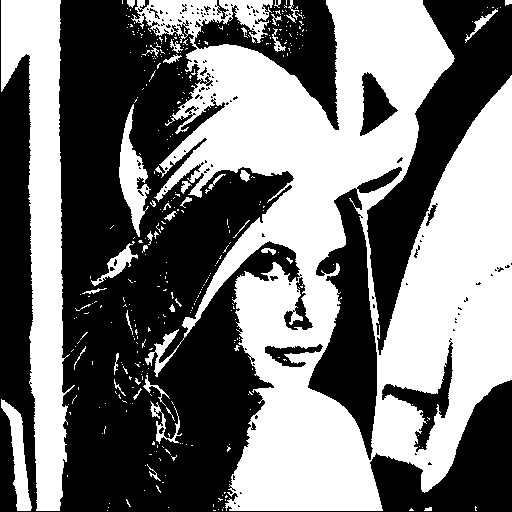

In [ ]:
cv2_imshow(JErosion)

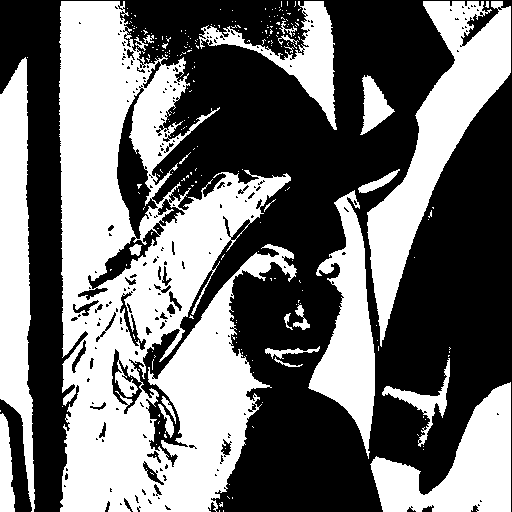

In [ ]:
cv2_imshow(KErosion)

In [1]:
%%writefile /content/drive/MyDrive/CVHW/HW4.py
import cv2
import numpy as np

def Convolu(img, pattern):
  n,m = pattern.shape
  padding_img = np.zeros((img.shape[0]+n-1,img.shape[1]+m-1))
  n_size = (n-1)//2
  m_size = (m-1)//2
  padding_img[n_size:-n_size,m_size:-m_size]=img
  padding_img_to1 = padding_img//255
  convolu_img_to1 = np.zeros(img.shape)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      convolu_img_to1[i,j] = np.sum(padding_img_to1[i:i+n,j:j+m]*pattern)
  return convolu_img_to1

def Dilation(convolu_img):
  return (convolu_img>0.5)*255

def Erosion(convolu_img):
  return (convolu_img>pattern_sum-0.5)*255

lena_gray = cv2.imread('lena.bmp', cv2.IMREAD_GRAYSCALE)
binarize_lena = lena_gray//128*255

octogonal_kernel = np.array([[0,1,1,1,0],
                             [1,1,1,1,1],
                             [1,1,1,1,1],
                             [1,1,1,1,1],
                             [0,1,1,1,0]])
J = np.array([[0,0,0],[1,1,0],[0,1,0]])
K = np.array([[0,1,1],[0,0,1],[0,0,0]])

convolu_binarize_lena = Convolu(binarize_lena, octogonal_kernel)
pattern_sum = np.sum(octogonal_kernel)

Dilation_binarize_lena = Dilation(convolu_binarize_lena)
Erosion_binarize_lena = Erosion(convolu_binarize_lena)
convolu_Erosion_binarize_lena = Convolu(Erosion_binarize_lena, octogonal_kernel)
Opening_binarize_lena = Dilation(convolu_Erosion_binarize_lena)
convolu_Dilation_binarize_lena = Convolu(Dilation_binarize_lena, octogonal_kernel)
Closing_binarize_lena = Erosion(convolu_Dilation_binarize_lena)
Jconvolu_binarize_lena = Convolu(binarize_lena, J)
pattern_sum = np.sum(J)
JErosion = Erosion(Jconvolu_binarize_lena)
Kconvolu_binarize_lena = Convolu(255-binarize_lena, K)
pattern_sum = np.sum(K)
KErosion = Erosion(Kconvolu_binarize_lena)
HitandMiss_binarize_lena = ((JErosion > 128)&(KErosion > 128))*255

cv2.imwrite('Dilation_binarize_lena.bmp', Dilation_binarize_lena)
cv2.imwrite('Erosion_binarize_lena.bmp', Erosion_binarize_lena)
cv2.imwrite('Opening_binarize_lena.bmp', Opening_binarize_lena)
cv2.imwrite('Closing_binarize_lena.bmp', Closing_binarize_lena)
cv2.imwrite('HitandMiss_binarize_lena.bmp', HitandMiss_binarize_lena)

Writing /content/drive/MyDrive/CVHW/HW4.py
